In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter

In [31]:
df1 = pd.read_csv('/content/drive/MyDrive/iplData/IPL Ball-by-Ball 2008-2020.csv',parse_dates = True)

print(df1.head(10))

       id  inning  ...           batting_team                 bowling_team
0  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
1  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
2  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
3  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
4  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
5  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
6  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
7  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
8  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore
9  335982       1  ...  Kolkata Knight Riders  Royal Challengers Bangalore

[10 rows x 18 columns]


In [32]:
df = pd.read_csv('/content/drive/MyDrive/iplData/IPL Matches 2008-2020.csv',parse_dates = True)

print(df.head(10))

       id        city        date  ... method    umpire1         umpire2
0  335982   Bangalore  2008-04-18  ...    NaN  Asad Rauf     RE Koertzen
1  335983  Chandigarh  2008-04-19  ...    NaN  MR Benson      SL Shastri
2  335984       Delhi  2008-04-19  ...    NaN  Aleem Dar  GA Pratapkumar
3  335985      Mumbai  2008-04-20  ...    NaN   SJ Davis       DJ Harper
4  335986     Kolkata  2008-04-20  ...    NaN  BF Bowden     K Hariharan
5  335987      Jaipur  2008-04-21  ...    NaN  Aleem Dar       RB Tiffin
6  335988   Hyderabad  2008-04-22  ...    NaN  IL Howell       AM Saheba
7  335989     Chennai  2008-04-23  ...    NaN  DJ Harper  GA Pratapkumar
8  335990   Hyderabad  2008-04-24  ...    NaN  Asad Rauf       MR Benson
9  335991  Chandigarh  2008-04-25  ...    NaN  Aleem Dar       AM Saheba

[10 rows x 17 columns]


In [ ]:
#Mean
x = df1["batsman_runs"].mean()
print(int(x))
#df["batsman_runs"].fillna(x, inplace = True)

1


In [ ]:
#Median
x = df1["batsman_runs"].median()
print(x)
#df["batsman_runs"].fillna(x, inplace = True)

1.0


In [ ]:
#Mode
x = df1["batsman_runs"].mode()[0]
print(x)
#df["batsman_runs"].fillna(x, inplace = True)

0


In [33]:
df.loc[:,["date","team1","team2"]]

,date,team1,team2
0,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
1,2008-04-19,Kings XI Punjab,Chennai Super Kings
2,2008-04-19,Delhi Daredevils,Rajasthan Royals
3,2008-04-20,Mumbai Indians,Royal Challengers Bangalore
4,2008-04-20,Kolkata Knight Riders,Deccan Chargers
...,...,...,...
811,2020-09-28,Royal Challengers Bangalore,Mumbai Indians
812,2020-11-05,Mumbai Indians,Delhi Capitals
813,2020-11-06,Royal Challengers Bangalore,Sunrisers Hyderabad
814,2020-11-08,Delhi Capitals,Sunrisers Hyderabad


In [34]:
df = df.drop(columns = ['id','method'])

In [35]:
nans_indices = df.columns[df.isna().any()].tolist()

df.loc[:,nans_indices]


,city,player_of_match,winner,result,result_margin,eliminator
0,Bangalore,BB McCullum,Kolkata Knight Riders,runs,140.0,N
1,Chandigarh,MEK Hussey,Chennai Super Kings,runs,33.0,N
2,Delhi,MF Maharoof,Delhi Daredevils,wickets,9.0,N
3,Mumbai,MV Boucher,Royal Challengers Bangalore,wickets,5.0,N
4,Kolkata,DJ Hussey,Kolkata Knight Riders,wickets,5.0,N
...,...,...,...,...,...,...
811,Dubai,AB de Villiers,Royal Challengers Bangalore,tie,NaN,Y
812,Dubai,JJ Bumrah,Mumbai Indians,runs,57.0,N
813,Abu Dhabi,KS Williamson,Sunrisers Hyderabad,wickets,6.0,N
814,Abu Dhabi,MP Stoinis,Delhi Capitals,runs,17.0,N


In [36]:
df['city'] = df['city'].fillna('Unkown City')

df['winner'] = df['winner'].fillna('No Result')

df['result'] = df['result'].fillna('No Result')

df['player_of_match'] = df['player_of_match'].fillna('No Result')

df['result_margin'] = df['result_margin'].fillna(0)

In [37]:
df = df.drop(columns = ['eliminator'])

In [38]:
df = df.replace(['Delhi Daredevils'],'Delhi Capitals')

df = df.replace(['Rising Pune Supergiants'],'Rising Pune Supergiant')

df = df.replace(['Deccan Chargers'],'Sunrisers Hyderabad')

In [39]:
df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'No Result',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [40]:
df.loc[:,["venue","toss_winner"]]

,venue,toss_winner
0,M Chinnaswamy Stadium,Royal Challengers Bangalore
1,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
2,Feroz Shah Kotla,Rajasthan Royals
3,Wankhede Stadium,Mumbai Indians
4,Eden Gardens,Sunrisers Hyderabad
...,...,...
811,Dubai International Cricket Stadium,Mumbai Indians
812,Dubai International Cricket Stadium,Delhi Capitals
813,Sheikh Zayed Stadium,Sunrisers Hyderabad
814,Sheikh Zayed Stadium,Delhi Capitals


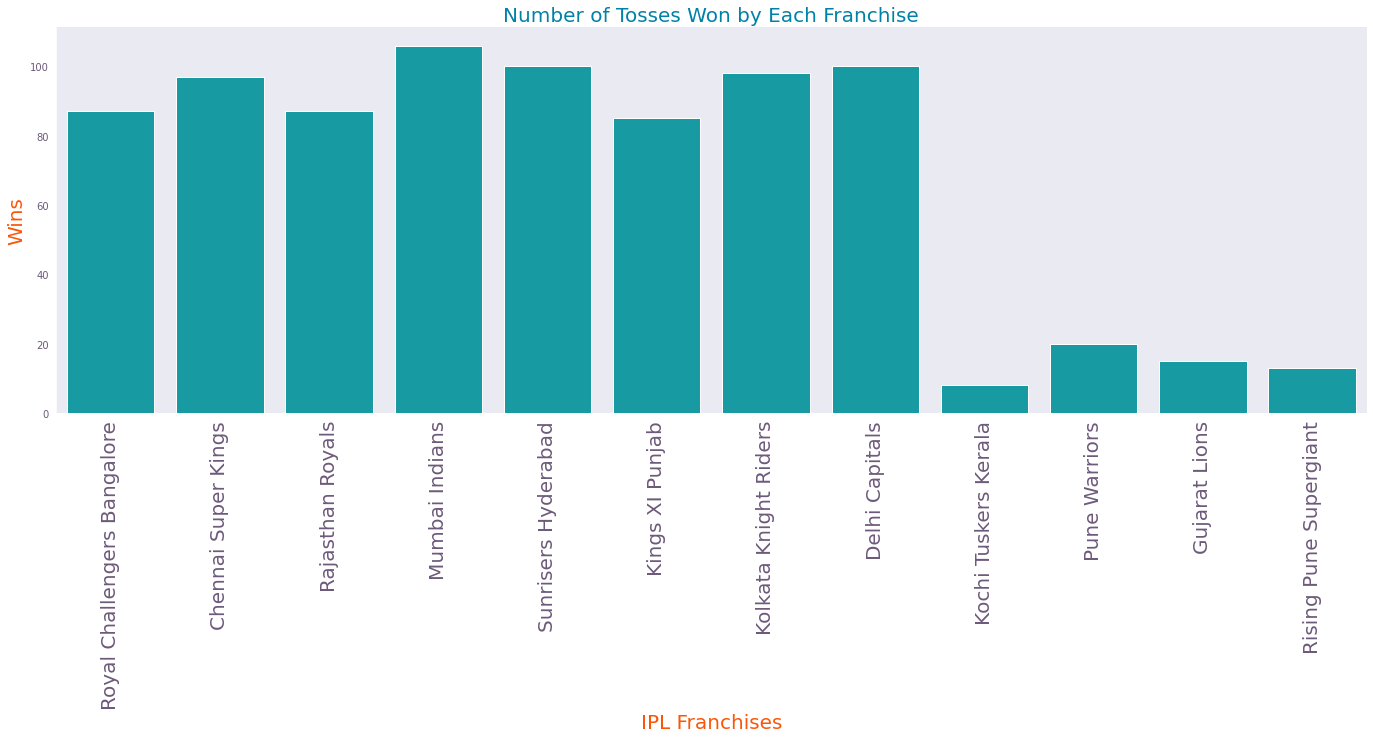

<Figure size 432x288 with 0 Axes>

In [41]:

winner = sns.catplot(kind = 'count', x = 'toss_winner', data = df, color  = '#00afb9')

## Customising the Plot ##

sns.set_style('dark')

winner.fig.set_size_inches([28,6])

plt.title("Number of Tosses Won by Each Franchise", fontsize = 20, color  = '#0081a7')

plt.ylabel('Wins',color = '#fb5607', fontsize = 20)

plt.xlabel('IPL Franchises', color = '#fb5607', fontsize = 20)

plt.xticks(rotation = 90, color = '#6d597a', fontsize = 20)

plt.yticks(color = '#6d597a')

plt.show()

plt.clf()

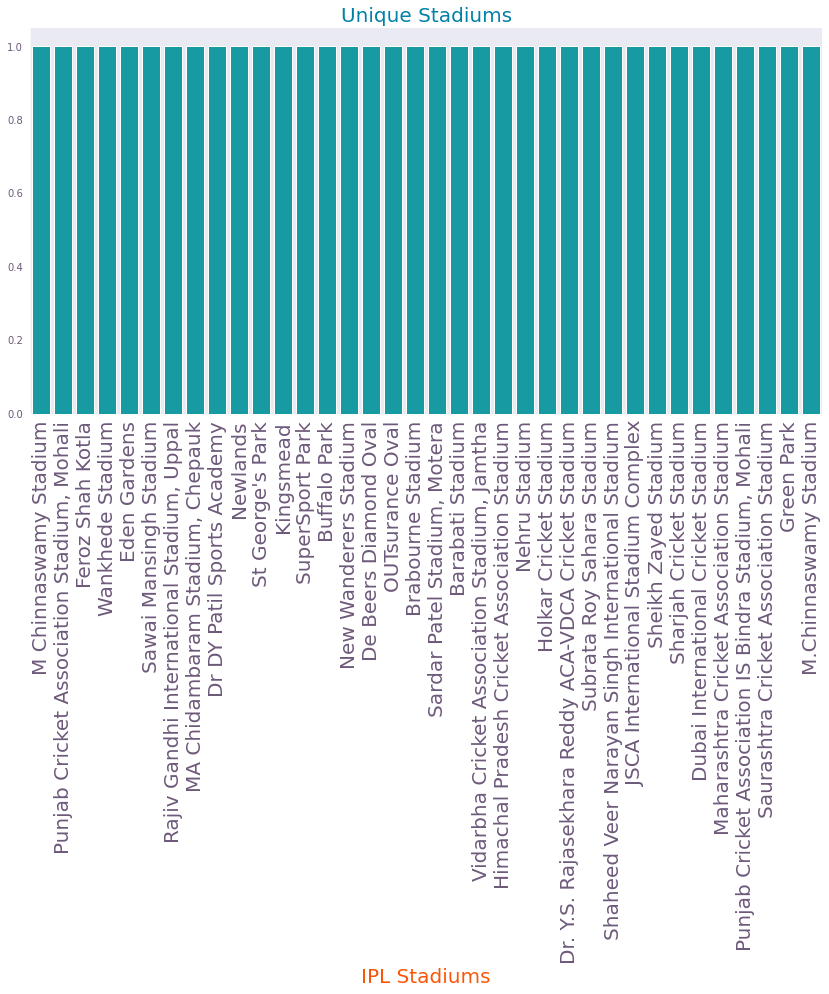

<Figure size 432x288 with 0 Axes>

In [42]:
winner = sns.catplot(kind = 'count', x = df['venue'].unique(), data = df, color  = '#00afb9')

## Customising the Plot ##

sns.set_style('dark')

winner.fig.set_size_inches([28,6])

plt.title("Unique Stadiums", fontsize = 20, color  = '#0081a7')

plt.ylabel('',color = '#fb5607', fontsize = 20)

plt.xlabel('IPL Stadiums', color = '#fb5607', fontsize = 20)

plt.xticks(rotation = 90, color = '#6d597a', fontsize = 20)

plt.yticks(color = '#6d597a')

plt.show()

plt.clf()

In [43]:
x1=df["venue"].tolist()
unique_x= df['venue'].unique().tolist()
y1=df["toss_winner"].tolist()
unique_y= df["toss_winner"].unique().tolist()

In [44]:
list_count= np.zeros((len(unique_y),), dtype=int).tolist()
dict={}
for venue in unique_x:
  dict[venue]=[]
for idx, venue in enumerate(x1):
  dict[venue].append(y1[idx])

In [22]:
graph_x=[]
graph_y=[]
for venue in unique_x:
  data_v = dict[venue]
  x = unique_y[0]
  d = Counter(data_v) 
  print('{} had won toss at {} for {} times'.format(x, venue, d[x]))
  #adding x and y axis for RCB for graph/visualization
  graph_x.append(venue)
  graph_y.append(d[x])
  #print(venue,data_v)
print(graph_x)
print(graph_y)

Royal Challengers Bangalore had won toss at M Chinnaswamy Stadium for 23 times
Royal Challengers Bangalore had won toss at Punjab Cricket Association Stadium, Mohali for 3 times
Royal Challengers Bangalore had won toss at Feroz Shah Kotla for 5 times
Royal Challengers Bangalore had won toss at Wankhede Stadium for 5 times
Royal Challengers Bangalore had won toss at Eden Gardens for 5 times
Royal Challengers Bangalore had won toss at Sawai Mansingh Stadium for 2 times
Royal Challengers Bangalore had won toss at Rajiv Gandhi International Stadium, Uppal for 8 times
Royal Challengers Bangalore had won toss at MA Chidambaram Stadium, Chepauk for 3 times
Royal Challengers Bangalore had won toss at Dr DY Patil Sports Academy for 0 times
Royal Challengers Bangalore had won toss at Newlands for 1 times
Royal Challengers Bangalore had won toss at St George's Park for 1 times
Royal Challengers Bangalore had won toss at Kingsmead for 2 times
Royal Challengers Bangalore had won toss at SuperSport 

In [45]:
x = unique_y[0]
d = Counter(data_v) 
print('{} has occurred {} times'.format(x, d[x]))
data_v

Royal Challengers Bangalore has occurred 6 times


['Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Royal Challengers Bangalore']

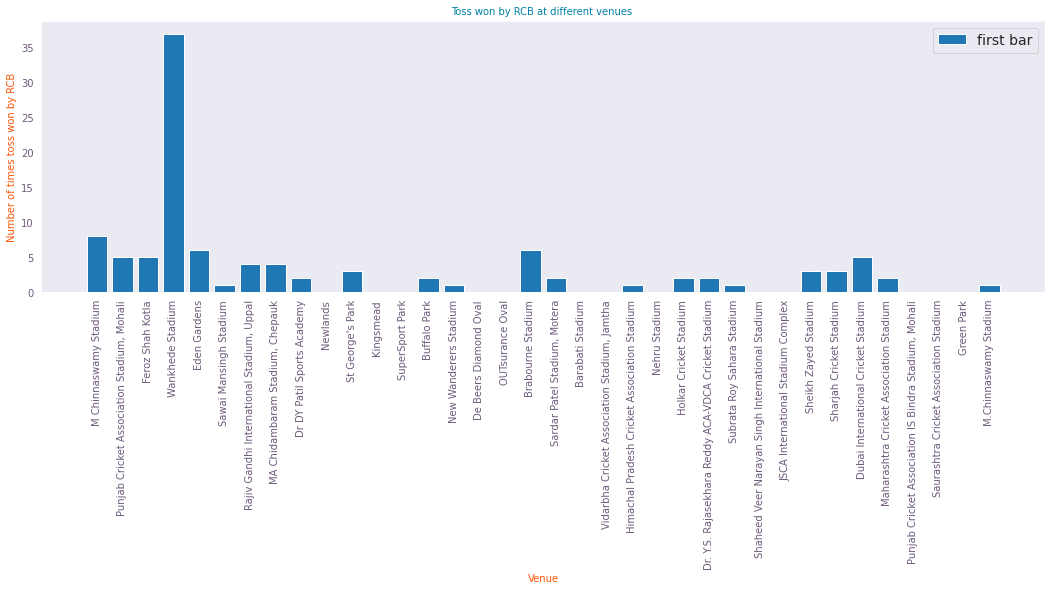

In [46]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(graph_x, graph_y, label = 'first bar')
plt.xticks(rotation = 90, fontsize = 10,color = '#6d597a')

plt.yticks(color = '#6d597a')

plt.ylabel("Number of times toss won by RCB", fontsize = 10, color = '#fb5607')

plt.xlabel("Venue", fontsize = 10, color = '#fb5607')

plt.title("Toss won by RCB at different venues ", color  = '#0081a7', fontsize = 10)

#plt.axhline(np.mean(percentage_of_wins), label = 'Mean', linestyle = '--', color = '#0077b6')

plt.legend(fontsize = 14)

plt.show()

In [47]:
graph_x=[]
graph_y=[]
for venue in unique_x:
  data_v = dict[venue]
  x = unique_y[3]
  d = Counter(data_v) 
  print('{} had won toss at {} for {} times'.format(x, venue, d[x]))
  #adding x and y axis for MI for graph/visualization
  graph_x.append(venue)
  graph_y.append(d[x])
  #print(venue,data_v)
print(graph_x)
print(graph_y)

Mumbai Indians had won toss at M Chinnaswamy Stadium for 8 times
Mumbai Indians had won toss at Punjab Cricket Association Stadium, Mohali for 5 times
Mumbai Indians had won toss at Feroz Shah Kotla for 5 times
Mumbai Indians had won toss at Wankhede Stadium for 37 times
Mumbai Indians had won toss at Eden Gardens for 6 times
Mumbai Indians had won toss at Sawai Mansingh Stadium for 1 times
Mumbai Indians had won toss at Rajiv Gandhi International Stadium, Uppal for 4 times
Mumbai Indians had won toss at MA Chidambaram Stadium, Chepauk for 4 times
Mumbai Indians had won toss at Dr DY Patil Sports Academy for 2 times
Mumbai Indians had won toss at Newlands for 0 times
Mumbai Indians had won toss at St George's Park for 3 times
Mumbai Indians had won toss at Kingsmead for 0 times
Mumbai Indians had won toss at SuperSport Park for 0 times
Mumbai Indians had won toss at Buffalo Park for 2 times
Mumbai Indians had won toss at New Wanderers Stadium for 1 times
Mumbai Indians had won toss at 

In [48]:
x = unique_y[3]
d = Counter(data_v) 
print('{} has occurred {} times'.format(x, d[x]))
data_v

Mumbai Indians has occurred 1 times


['Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Royal Challengers Bangalore']

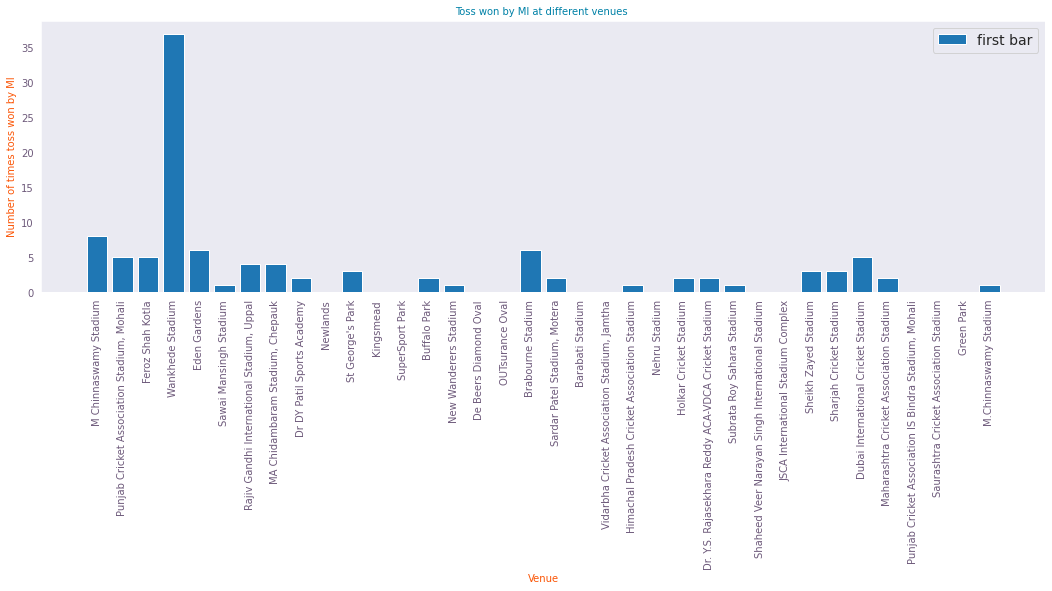

In [49]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(graph_x, graph_y, label = 'first bar')
plt.xticks(rotation = 90, fontsize = 10,color = '#6d597a')

plt.yticks(color = '#6d597a')

plt.ylabel("Number of times toss won by MI", fontsize = 10, color = '#fb5607')

plt.xlabel("Venue", fontsize = 10, color = '#fb5607')

plt.title("Toss won by MI at different venues ", color  = '#0081a7', fontsize = 10)

#plt.axhline(np.mean(percentage_of_wins), label = 'Mean', linestyle = '--', color = '#0077b6')

plt.legend(fontsize = 14)

plt.show()

In [53]:
venue_rcb_mi=[]
toss_winner_rcb_mi=[]
toss_decision_rcb_mi=[]
result_rcb_mi=[]
result_margin_rcb_mi=[]
uppires_rcb_mi=[]
row_numbers_rcb_mi=[]
teams_for_todays_match=['Royal Challengers Bangalore','Mumbai Indians']
team1_rcb_mi=df["team1"].tolist()
team2_rcb_mi=df["team2"].tolist()
for idx,team in enumerate(team1_rcb_mi):
  for idx1,teamm in enumerate(team2_rcb_mi):
    if idx==idx1:
      if team in teams_for_todays_match:
        if teamm in teams_for_todays_match:
          row_numbers_rcb_mi.append(idx)
print(len(row_numbers_rcb_mi))
row_numbers_rcb_mi

27


[3,
 30,
 83,
 93,
 128,
 166,
 171,
 182,
 246,
 300,
 307,
 323,
 357,
 402,
 424,
 474,
 502,
 530,
 557,
 588,
 613,
 649,
 666,
 702,
 726,
 763,
 811]

In [57]:
df_rcb_mi=df[(df["team1"].isin(teams_for_todays_match))&(df["team2"].isin(teams_for_todays_match))]
print(df_rcb_mi.head())

               city        date  ...          umpire1         umpire2
3            Mumbai  2008-04-20  ...         SJ Davis       DJ Harper
30        Bangalore  2008-05-28  ...        BF Bowden  AV Jayaprakash
83     Johannesburg  2009-05-03  ...      RE Koertzen  TH Wijewardene
93   Port Elizabeth  2009-05-10  ...      BR Doctrove      BG Jerling
128          Mumbai  2010-03-20  ...  HDPK Dharmasena       SS Hazare

[5 rows x 14 columns]


In [59]:
df_todays_venue=df_rcb_mi[(df_rcb_mi["venue"]=="MA Chidambaram Stadium, Chepauk")]
df_todays_venue

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
246,Chennai,2011-05-27,CH Gayle,"MA Chidambaram Stadium, Chepauk",0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,runs,43.0,Asad Rauf,SJA Taufel


In [84]:
# df_todays_venue1=df_rcb_mi[(df_rcb_mi["umpire1"]=="MA Chidambaram Stadium, Chepauk")]
df["umpire1"].unique()

array(['Asad Rauf', 'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden',
       'IL Howell', 'DJ Harper', 'RE Koertzen', 'BR Doctrove',
       'AV Jayaprakash', 'BG Jerling', 'M Erasmus', 'HDPK Dharmasena',
       'S Asnani', 'GAV Baxter', 'SS Hazare', 'K Hariharan', 'SL Shastri',
       'SK Tarapore', 'S Ravi', 'SJA Taufel', 'S Das', 'AM Saheba',
       'PR Reiffel', 'JD Cloete', 'AK Chaudhary', 'VA Kulkarni',
       'BNJ Oxenford', 'CK Nandan', 'C Shamshuddin', 'NJ Llong',
       'RK Illingworth', 'RM Deshpande', 'K Srinath', 'SD Fry',
       'CB Gaffaney', 'PG Pathak', 'Nitin Menon', 'K Bharatan',
       'AY Dandekar', 'KN Ananthapadmanabhan', 'A Nand Kishore',
       'A Deshmukh', 'YC Barde', 'RJ Tucker', 'VK Sharma', 'UV Gandhe',
       'IJ Gould'], dtype=object)

In [62]:
todays_umpires=["C Shamshuddin","UV Gandhe","KN Ananthapadmanabhan","Nitin Menon"]
df_todays_umpire=df_rcb_mi[(df_rcb_mi["umpire1"].isin(todays_umpires))&(df_rcb_mi["umpire2"].isin(todays_umpires))]
df_todays_umpire

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2


In [65]:
df_rcb_mi["toss_winner"].value_counts()

Mumbai Indians                 18
Royal Challengers Bangalore     9
Name: toss_winner, dtype: int64

In [68]:
df_todays_mumbai_toss=df_rcb_mi[(df_rcb_mi["toss_winner"]=="Mumbai Indians")]
df_todays_rcb_toss=df_rcb_mi[(df_rcb_mi["toss_winner"]=="Royal Challengers Bangalore")]
print(df_todays_mumbai_toss["toss_decision"].value_counts())
print(df_todays_rcb_toss["toss_decision"].value_counts())

field    12
bat       6
Name: toss_decision, dtype: int64
field    7
bat      2
Name: toss_decision, dtype: int64


In [72]:
print("now printing MI win & loss count if they have won the toss\n")
print(df_todays_mumbai_toss["winner"].value_counts())
print("\nnow printing rcb win loss & count if they have won the toss\n")
print(df_todays_rcb_toss["winner"].value_counts())

now printing MI win & loss count if they have won the toss

Mumbai Indians                 11
Royal Challengers Bangalore     7
Name: winner, dtype: int64

now printing rcb win loss & count if they have won the toss

Mumbai Indians                 6
Royal Challengers Bangalore    3
Name: winner, dtype: int64


In [82]:
df_field_mi=df_todays_mumbai_toss[(df_todays_mumbai_toss["toss_decision"]=="field")]
print("MI toss win and field\n",df_field_mi["winner"].value_counts())

df_field_mi=df_todays_mumbai_toss[(df_todays_mumbai_toss["toss_decision"]=="bat")]
print("MI toss win and bat\n",df_field_mi["winner"].value_counts())


MI toss win and field
 Mumbai Indians                 8
Royal Challengers Bangalore    4
Name: winner, dtype: int64
MI toss win and bat
 Mumbai Indians                 3
Royal Challengers Bangalore    3
Name: winner, dtype: int64


In [83]:
df_field_mi=df_todays_rcb_toss[(df_todays_rcb_toss["toss_decision"]=="field")]
print("rcb toss win and field\n",df_field_mi["winner"].value_counts())

df_field_mi=df_todays_rcb_toss[(df_todays_rcb_toss["toss_decision"]=="bat")]
print("rcb toss win and bat\n",df_field_mi["winner"].value_counts())

rcb toss win and field
 Mumbai Indians                 5
Royal Challengers Bangalore    2
Name: winner, dtype: int64
rcb toss win and bat
 Mumbai Indians                 1
Royal Challengers Bangalore    1
Name: winner, dtype: int64
